In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4449,ham,"Awesome, be there in a minute",NaN,NaN,NaN
3101,ham,Even if he my friend he is a priest call him now,NaN,NaN,NaN
1351,ham,Yo theres no class tmrw right?,NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
541,ham,A famous quote : when you develop the ability ...
3405,ham,\HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S...
4117,ham,Watch lor. I saw a few swatch one i thk quite ...
2799,ham,"House-Maid is the murderer, coz the man was mu..."
341,ham,I take it the post has come then! You must hav...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
#remove duplicates
df= df.drop_duplicates(keep="first")

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2. EDA(Exploratory Data Analysis)

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22ee65486b0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

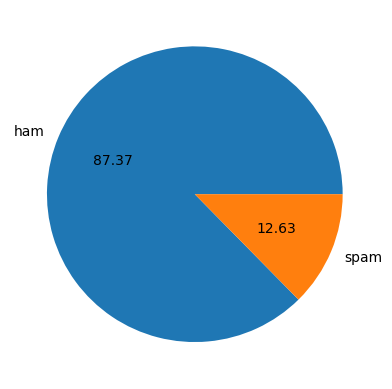

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")

In [20]:
# Data is imbalanced


In [21]:
import nltk

In [22]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#no of characters
df['num_characters']=df['text'].apply(len)

In [24]:
#no of words
df['num_words']=df['text'].apply(lambda x:len( nltk.word_tokenize(x)))

In [25]:
#no of sentences
df['num_sentences']=df['text'].apply(lambda x:len( nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

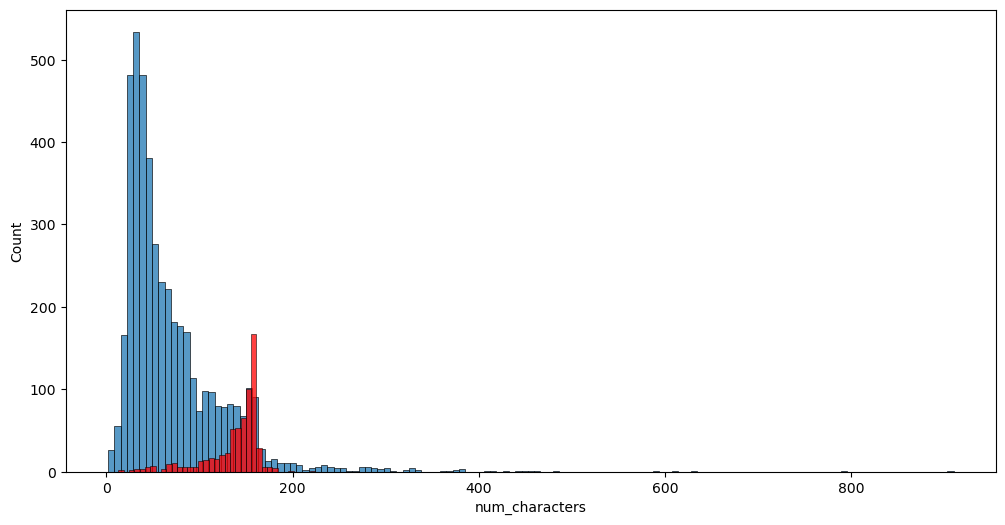

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

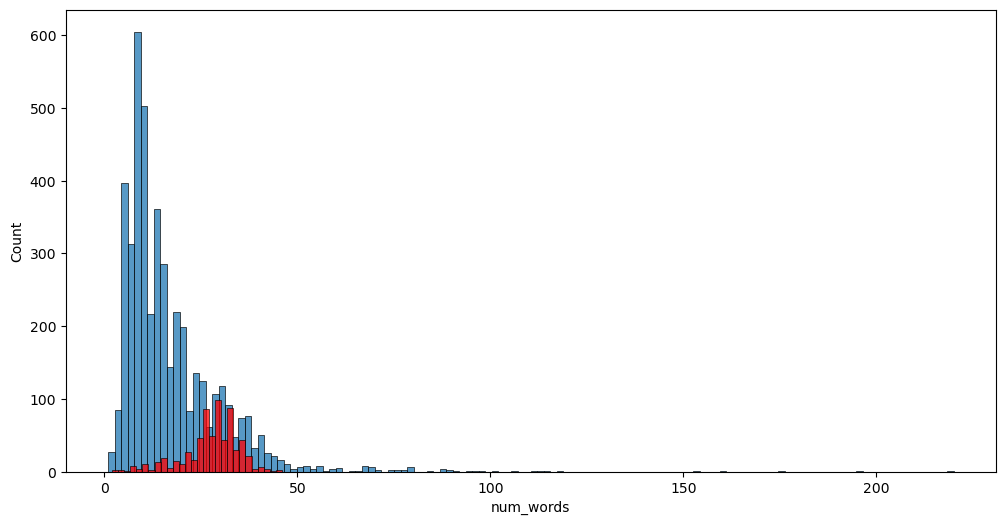

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color="red")

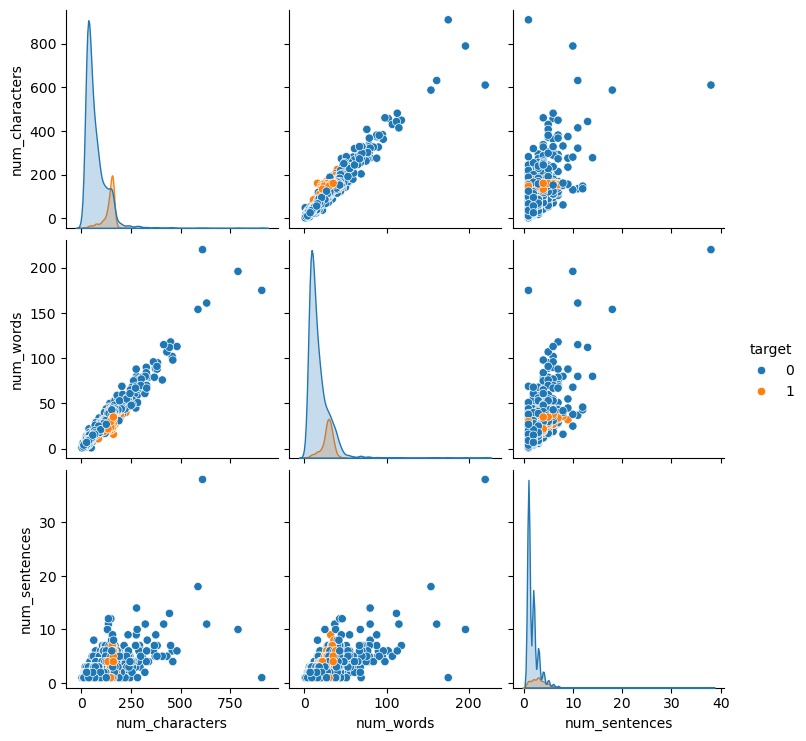

In [33]:
sns.pairplot(df,hue="target")

<Axes: >

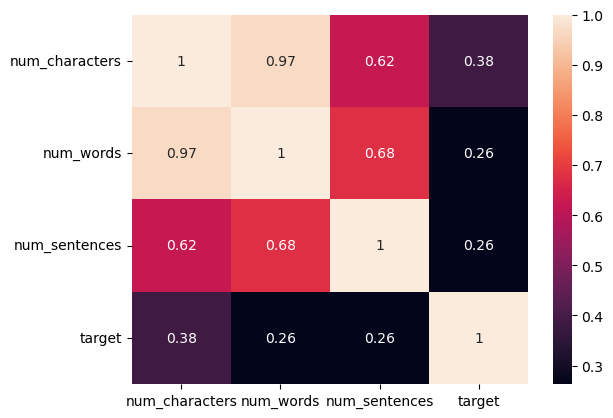

In [34]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df['target'] = df['target']
sns.heatmap(numeric_df.corr(),annot=True)
#the variance of num_characters is most with the target

## 3. DATA PREPROCESSING


In [36]:
#lower case, tokenize, remove special characters, remove stop words, stemming

In [37]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

def text_processor(text):
    stemmer = PorterStemmer()
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    filtered_tokens = []
    for word in tokens:
        if word.isalnum() and word not in stopwords.words("english"):
            stemmed_word = stemmer.stem(word)
            filtered_tokens.append(stemmed_word)
    
    return " ".join(filtered_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
df["transformed_text"]=df["text"].apply(text_processor)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [41]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [42]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

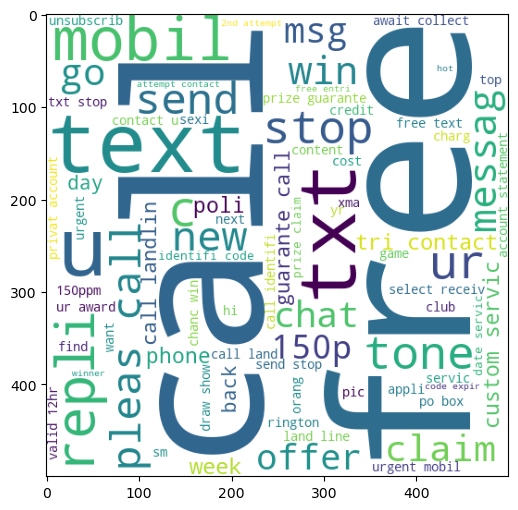

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

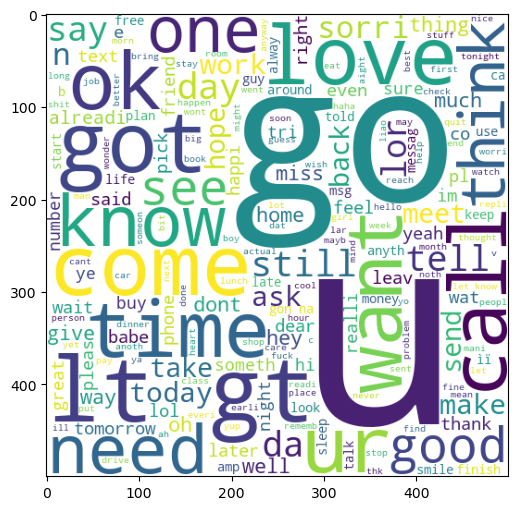

In [44]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [45]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [47]:
len(spam_corpus)

9939

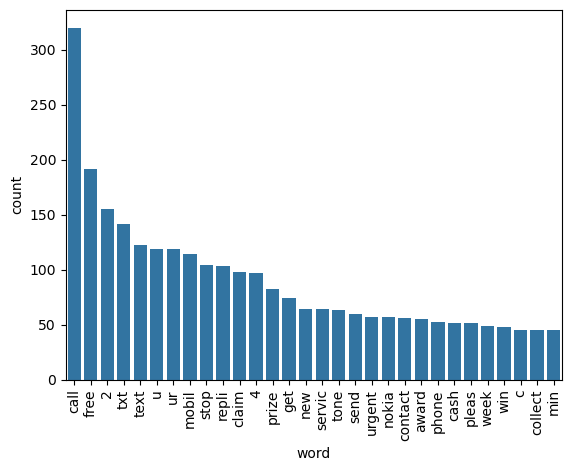

In [48]:
from collections import Counter
spam_counter = Counter(spam_corpus)
spam_df = pd.DataFrame(spam_counter.most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation="vertical")
plt.show()

In [49]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

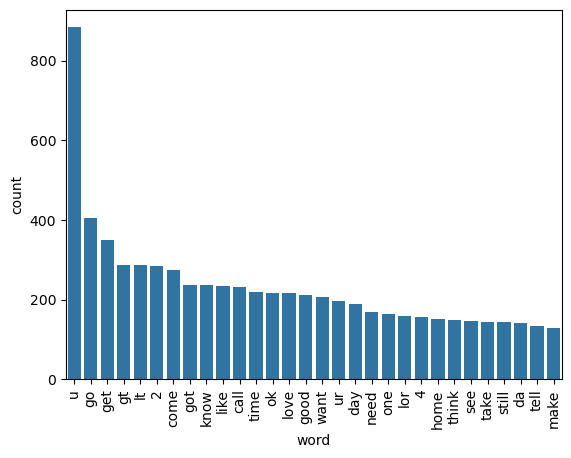

In [50]:
ham_counter = Counter(ham_corpus)
ham_df = pd.DataFrame(ham_counter.most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation="vertical")
plt.show()

## 4.Model Building

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [53]:
X= tfidf.fit_transform(df["transformed_text"]).toarray()

In [54]:
y=df["target"].values

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [60]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#best model

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [61]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [63]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))